수식 작성하여 plot으로 뽑기

In [76]:
# 사전 변수

savefile_name = "expression_plot_psp_kernel.svg"

# 수식에 사용할 변수 정의
t_m = 1.2
t_s = 1
eta = t_m / t_s
v_0 = eta ** (eta / (eta - 1))
tau = 1
intense_rate = 5
threshold_shift = 0.1 # 임계치를 넘은 경우 다음 타이밍으로 넘기기 위한 값


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


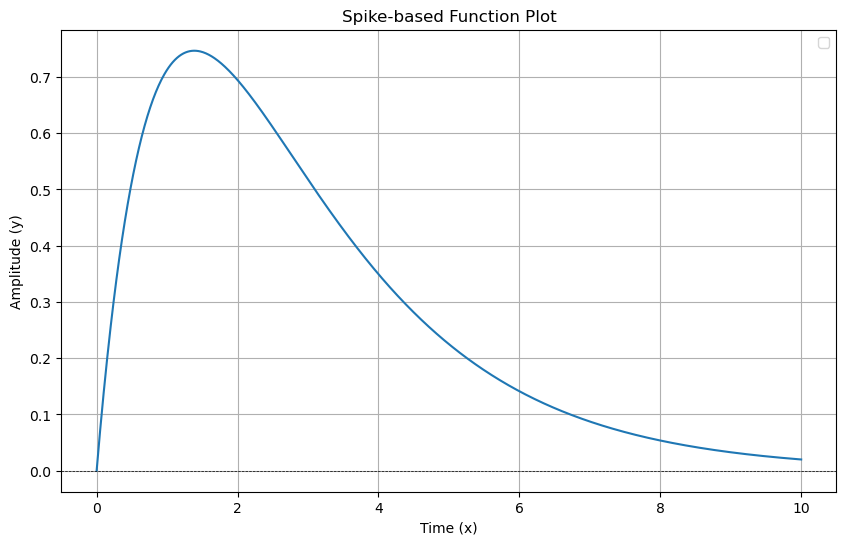

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# 시간축 설정
x = np.linspace(0, 10, 1000)  # 0부터 10까지 1000개의 점

# 스파이크 위치와 수식 번호 설정 (시간대와 매핑된 수식 번호)
# spike_times = [1,2,2.5,4,6,6.6,7]  # threshold
spike_times = [0]
# spike_times = [1,2,2.5,5,6,7]
spike_function_indices = [1,1,1,1,1,1,1,1,1,1,1,1]  # 각 시간에 해당하는 수식 번호



# 수식을 정의 (하드코딩)
def psp_kernel(x):
    """기본 PSP 커널 함수"""
    return v_0 * (np.exp(intense_rate * (-x / 2)) - np.exp(-x * intense_rate))

def threshold_function(x, time):
    """임계치를 초과했을 때 실행될 함수"""
    return -v_0 * (np.exp(intense_rate * (-x / 2)) - np.exp(-x * intense_rate))

# 수식 리스트 (인덱스 기반 접근)
spike_functions = [None, psp_kernel]

# 그래프 값 초기화
y = np.zeros_like(x)

# 임계치 설정
threshold = 15  # y값의 임계치

# 스파이크 위치에 수식 적용
for spike_time, function_index in zip(spike_times, spike_function_indices):
    spike_function = spike_functions[function_index]
    if spike_function:
        # 타이밍을 중심으로 수식을 이동
        shifted_x = x - spike_time  # 스파이크 타이밍에 맞게 이동
        shifted_x = np.where(shifted_x >= 0, shifted_x, 0)  # 음수 제거 (정의역 제한)

        # 새로운 신호 생성
        new_signal = spike_function(shifted_x)
        y += new_signal  # 기본 신호는 항상 추가

# 반복적으로 임계치 초과 구간 처리
i = 0
while i < len(x):
    # 임계치를 초과하는 위치 찾기
    exceed_indices = np.where(y[i:] > threshold)[0]
    if len(exceed_indices) == 0:
        break  # 더 이상 초과하는 값이 없으면 종료

    exceed_index = exceed_indices[0] + i  # 실제 초과 위치
    exceed_time = x[exceed_index]  # 초과한 시간 계산

    # 해당 시간 기준으로 임계치 함수 실행
    shifted_x = x - exceed_time  # 초과 시간 기준으로 이동
    shifted_x = np.where(shifted_x >= 0, shifted_x, 0)  # 음수 제거
    y += threshold_function(shifted_x, exceed_time)  # 임계치 함수 추가

    # 다음 위치를 현재 초과 위치에서 0.1 떨어진 지점으로 이동
    i = exceed_index + int(threshold_shift / (x[1] - x[0]))  # 0.1 간격 이동

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Spike-based Function Plot")
plt.xlabel("Time (x)")
plt.ylabel("Amplitude (y)")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(True)
plt.legend()
plt.savefig(savefile_name, format="svg", bbox_inches="tight")
plt.show()
